In [57]:
import numpy as np
import matplotlib.pyplot as plt


Newthon


In [58]:
def divided_diff_triangle2(a, fa):
    assert len(a) == len(fa)
    n = len(a)
    table = np.zeros((n, n), dtype=np.float64)
    def f_(y1, y0, x1, x0): return (y1-y0)/(x1-x0)
    table[:, 0] = fa
    for i in range(1, n+1):  # col
        for j in range(i, n):  # row
            print(i, j, a[j], a[j-i])
            table[j][i] = f_(table[j][i-1], table[j-1][i-1], a[j], a[j-i])
            print(table)
    coef = [table[i][i] for i in range(n)]
    return coef


In [59]:
def divided_diff_triangle(a, fa):
    assert len(a) == len(fa)
    n = len(a)
    table = np.zeros((n, n), dtype=np.float64)
    def f_(y1, y0, x1, x0): return (y1-y0)/(x1-x0)
    table[:, 0] = fa
    for j in range(1, n):  # col
        for i in range(n-j):  # row
            table[i][j] = f_(table[i+1][j-1], table[i][j-1], a[i+j], a[i])
            print(table)
    coef = [table[0][i] for i in range(n)]
    return coef


In [66]:
# a = (1, 2, 3, -4, 5)
# fa = (2, 48, 272, 1182, 2262)
#a = (0,1,-1,2,-2)
#fa = (-5,-3,-15,39,-9)
#a = (0,2/3,1)
#fa = (1,0.5,0)
a = (8,-2,5)
fa = (9,2,13)


In [67]:
coef_tri = divided_diff_triangle(a, fa)
print(coef_tri)


[[ 9.   0.7  0. ]
 [ 2.   0.   0. ]
 [13.   0.   0. ]]
[[ 9.          0.7         0.        ]
 [ 2.          1.57142857  0.        ]
 [13.          0.          0.        ]]
[[ 9.          0.7        -0.29047619]
 [ 2.          1.57142857  0.        ]
 [13.          0.          0.        ]]
[9.0, 0.7, -0.2904761904761905]


In [68]:
coef_tri = divided_diff_triangle2(a, fa)
print(coef_tri)


1 1 -2 8
[[ 9.   0.   0. ]
 [ 2.   0.7  0. ]
 [13.   0.   0. ]]
1 2 5 -2
[[ 9.          0.          0.        ]
 [ 2.          0.7         0.        ]
 [13.          1.57142857  0.        ]]
2 2 5 8
[[ 9.          0.          0.        ]
 [ 2.          0.7         0.        ]
 [13.          1.57142857 -0.29047619]]
[9.0, 0.7, -0.2904761904761905]


In [75]:
def newton_p(x, a, coef):
    n = len(a)
    #print('degree ',n-1)
    ans = 0
    for i in range(n):
        mul = coef[i]
        print(mul, end="")
        for j in range(i):
            mul *= x - a[j]
            print("(x - {})".format(a[j]), end="")
        ans += mul
        print("+", end="")
    print('\n================\n')
    return ans


In [79]:
newton_ans = newton_p(-1, a, coef_tri)

print(newton_ans)
#print(newton_ans)


9.0+0.7(x - 8)+-0.2904761904761905(x - 8)(x - -2)+

5.314285714285715


In [70]:
0.75 * 2/3 -0.75

-0.25

In [77]:
def divided_diff(a, fa, pos, coef=[]):
    assert len(a) == len(fa)
    if len(a) == 1:
        print('fa[{}]={}'.format(a[0], fa[0]))
        if pos[0] == 0:
            coef.append(fa[0])
        return fa[0]
    *a_the_left, a_k = a
    a_0, *a_the_right = a
    *fa_the_left, fa_k = fa
    fa_0, *fa_the_right = fa
    *pos_the_left, pos_k = pos
    pos_0, *pos_the_right = pos
    print(a_0, a_the_left,  a_the_right, a_k)
    ans = (divided_diff(a_the_right, fa_the_right, pos_the_right, coef) -
           divided_diff(a_the_left, fa_the_left, pos_the_left, coef))/(a_k - a_0)
    print('divided diff {}= {}'.format(a, ans))
    if 0 in pos:
        coef.append(ans)
    return ans


In [78]:
coef = []
ans = divided_diff(a,fa,range(len(a)),coef)

8 [8, -2] [-2, 5] 5
-2 [-2] [5] 5
fa[5]=13
fa[-2]=2
divided diff [-2, 5]= 1.5714285714285714
8 [8] [-2] -2
fa[-2]=2
fa[8]=9
divided diff [8, -2]= 0.7
divided diff (8, -2, 5)= -0.2904761904761905


In [73]:
print(ans,coef)

-0.2904761904761905 [9, 0.7, -0.2904761904761905]


In [97]:
newton_p(-1,a,coef)

9+0.7(x - 8)+-0.2904761904761905(x - 8)(x - -2)+



5.314285714285715

2+46.0(x - 1)+89.0(x - 1)(x - 2)+6.0(x - 1)(x - 2)(x - 3)+4.0(x - 1)(x - 2)(x - 3)(x - -4)+



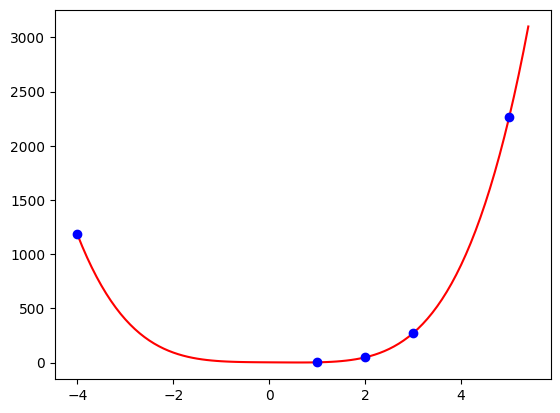

In [19]:
x = np.arange(-4, 5.5, 0.10)
y = newton_p(x, a, coef)

plt.plot(x, y, 'red')
plt.plot(a, fa, 'bo')


In [20]:
for i in range(len(x)):
    print(x[i],y[i])

-4.0 1182.0
-3.9 1072.9243999999999
-3.8 971.6383999999996
-3.6999999999999997 877.7603999999999
-3.5999999999999996 790.9184
-3.4999999999999996 710.7499999999998
-3.3999999999999995 636.9023999999993
-3.2999999999999994 569.0323999999996
-3.1999999999999993 506.8063999999997
-3.099999999999999 449.90039999999976
-2.999999999999999 397.9999999999996
-2.899999999999999 350.8003999999997
-2.799999999999999 308.00639999999964
-2.699999999999999 269.33239999999955
-2.5999999999999988 234.5023999999995
-2.4999999999999987 203.24999999999955
-2.3999999999999986 175.31839999999966
-2.2999999999999985 150.4603999999997
-2.1999999999999984 128.43839999999983
-2.0999999999999983 109.02439999999984
-1.9999999999999982 91.99999999999972
-1.8999999999999981 77.15639999999968
-1.799999999999998 64.29439999999977
-1.699999999999998 53.22439999999972
-1.5999999999999979 43.766399999999805
-1.4999999999999978 35.74999999999977
-1.3999999999999977 29.01439999999991
-1.2999999999999976 23.40839999999997

Laggange


In [94]:
def lagrange_p(x, a, fa):
    n = len(a)
    assert len(a) == len(fa)
    fili = []
    for i in range(n):
        numerator = 1
        denominator = 1
        for j in range(n):
            if (i != j):
                numerator *= x - a[j]
                denominator *= a[i] - a[j]
        print("value",fa[i], numerator, denominator)
        fili.append(fa[i]*numerator/denominator)
        print(fa[i])
        print(fili)
    return sum(fili)


In [95]:
12.0+1e-6 >=lagrange_p(-1,a,fa)>= 12.0-1e-6

value 9 -6 30
9
[-1.8]
value 2 54 70
2
[-1.8, 1.542857142857143]
value 13 -9 -21
13
[-1.8, 1.542857142857143, 5.571428571428571]


False

In [93]:
a=(8,-2, 5)
fa = (9,2,13)
print(lagrange_p(-1,a,fa))

9
[-1.8]
2
[-1.8, 1.542857142857143]
13
[-1.8, 1.542857142857143, 5.571428571428571]
5.314285714285714


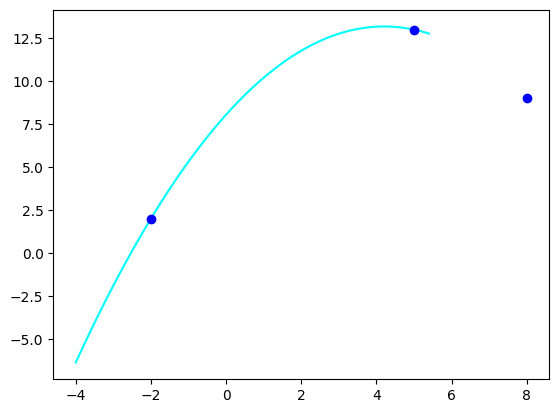

In [39]:
x = np.arange(-4, 5.5, 0.10)
y_lagrange = lagrange_p(x, a, fa)

#plt.plot(x, yans, 'red')
plt.plot(x, y_lagrange, 'cyan')
plt.plot(a, fa, 'bo')
mylagrange = ()


In [ ]:
9+0.7(-1 - 8)+-0.2904761904761905(x - 8)(x - -2
